In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autotime
import mne
import numpy as np
from . import (dataset,
                        vector_space,
                        distance_matrix,
                        recurrence_quantification_analysis,
                        features_space,
                        plot)

time: 11 s (started: 2022-10-31 13:19:09 +01:00)


In [2]:
selected_subject = 1
t_start = 0
t_end = 30
fir_filter = [2.0, 50.0]
min_vert_line_len = 30
min_diagonal_line_len = 2
min_white_vert_line_len = 2
cut_freq = 60
win_len = 240
n_fft = 512
percentile = 22
electrode_name = 'O2'

info_args = {"selected_subject":selected_subject,
             "win_len":win_len,"n_fft":n_fft,
             "eps":percentile, "electrode_name":electrode_name}

time: 1.21 ms (started: 2022-10-31 13:19:51 +01:00)


In [3]:
epochs, raw = dataset.eegbci_data(tmin=t_start, tmax=t_end,
                             subject=selected_subject,
                             filter_range=fir_filter)

Extracting EDF parameters from /Users/luki/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /Users/luki/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 2 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desi

In [22]:
print(epochs.ch_names)

['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz']
time: 310 µs (started: 2022-10-31 15:54:42 +01:00)


In [23]:
raw.plot()

Using qt as 2D backend.
Opening raw-browser...
Using pyopengl with version 3.1.6


time: 3.46 s (started: 2022-10-31 16:11:20 +01:00)


TypeError: plot_psd() got an unexpected keyword argument 'figsize'

time: 8.31 ms (started: 2022-10-31 16:15:24 +01:00)


In [ ]:
s_rate = epochs.info['sfreq']
electrode_index = epochs.ch_names.index(electrode_name)

electrode_open = epochs.get_data()[0][electrode_index] #* 1e6
electrode_close = epochs.get_data()[1][electrode_index] #* 1e6

In [11]:
stft_open = vector_space.compute_stft((electrode_open),
                                      n_fft=n_fft, win_len=win_len,
                                      s_rate=epochs.info['sfreq'],
                                      cut_freq=cut_freq)

stft_close = vector_space.compute_stft((electrode_close),
                                       n_fft=n_fft, win_len=win_len,
                                       s_rate=epochs.info['sfreq'],
                                       cut_freq=cut_freq)

time: 10.3 ms (started: 2022-10-31 13:22:14 +01:00)


In [12]:
matrix_open = distance_matrix.EuclideanPyRQA_RP_stft(stft_open)
matrix_close = distance_matrix.EuclideanPyRQA_RP_stft(stft_close)

nbr_open = np.percentile(matrix_open, percentile)
nbr_close = np.percentile(matrix_close, percentile)

matrix_open_binary = distance_matrix.set_epsilon(matrix_open,nbr_open)
matrix_close_binary = distance_matrix.set_epsilon(matrix_close,nbr_close)

time: 1.06 s (started: 2022-10-31 13:22:15 +01:00)


In [18]:
type(matrix_open_binary)

numpy.ndarray

time: 1.18 ms (started: 2022-10-31 14:44:33 +01:00)


In [20]:
np.save('matrix_open_binary.npy',matrix_open_binary)

time: 114 ms (started: 2022-10-31 14:53:25 +01:00)


In [13]:
result_rqa_tdemb_open = recurrence_quantification_analysis.get_results(matrix_open_binary,2,2,2)
result_rqa_tdemb_closed = recurrence_quantification_analysis.get_results(matrix_close_binary,2,2,2)
print(result_rqa_tdemb_open)
print(result_rqa_tdemb_closed)

[0.21999978837083883, 0.9999853992073743, 70.34985147552817, 4801, 0.00020828993959591752, 5.057890450297465, 4.545392550659032, 0.9999929036353099, 98.78074616403147, 934, 5.499887081587729, 1.0000075045375079, 321.652258664473, 4721, 6.57573721554017, 99.71224975585938]
[0.2199998751041016, 0.9999925022986373, 70.59929236084025, 4801, 0.00020828993959591752, 4.996743302066405, 4.545423045469692, 0.9999960575767265, 98.34448666253101, 760, 5.4568726641939955, 1.0000035553047457, 320.7862276837468, 4740, 6.565318163025989, 99.3067626953125]
time: 277 ms (started: 2022-10-31 13:22:18 +01:00)


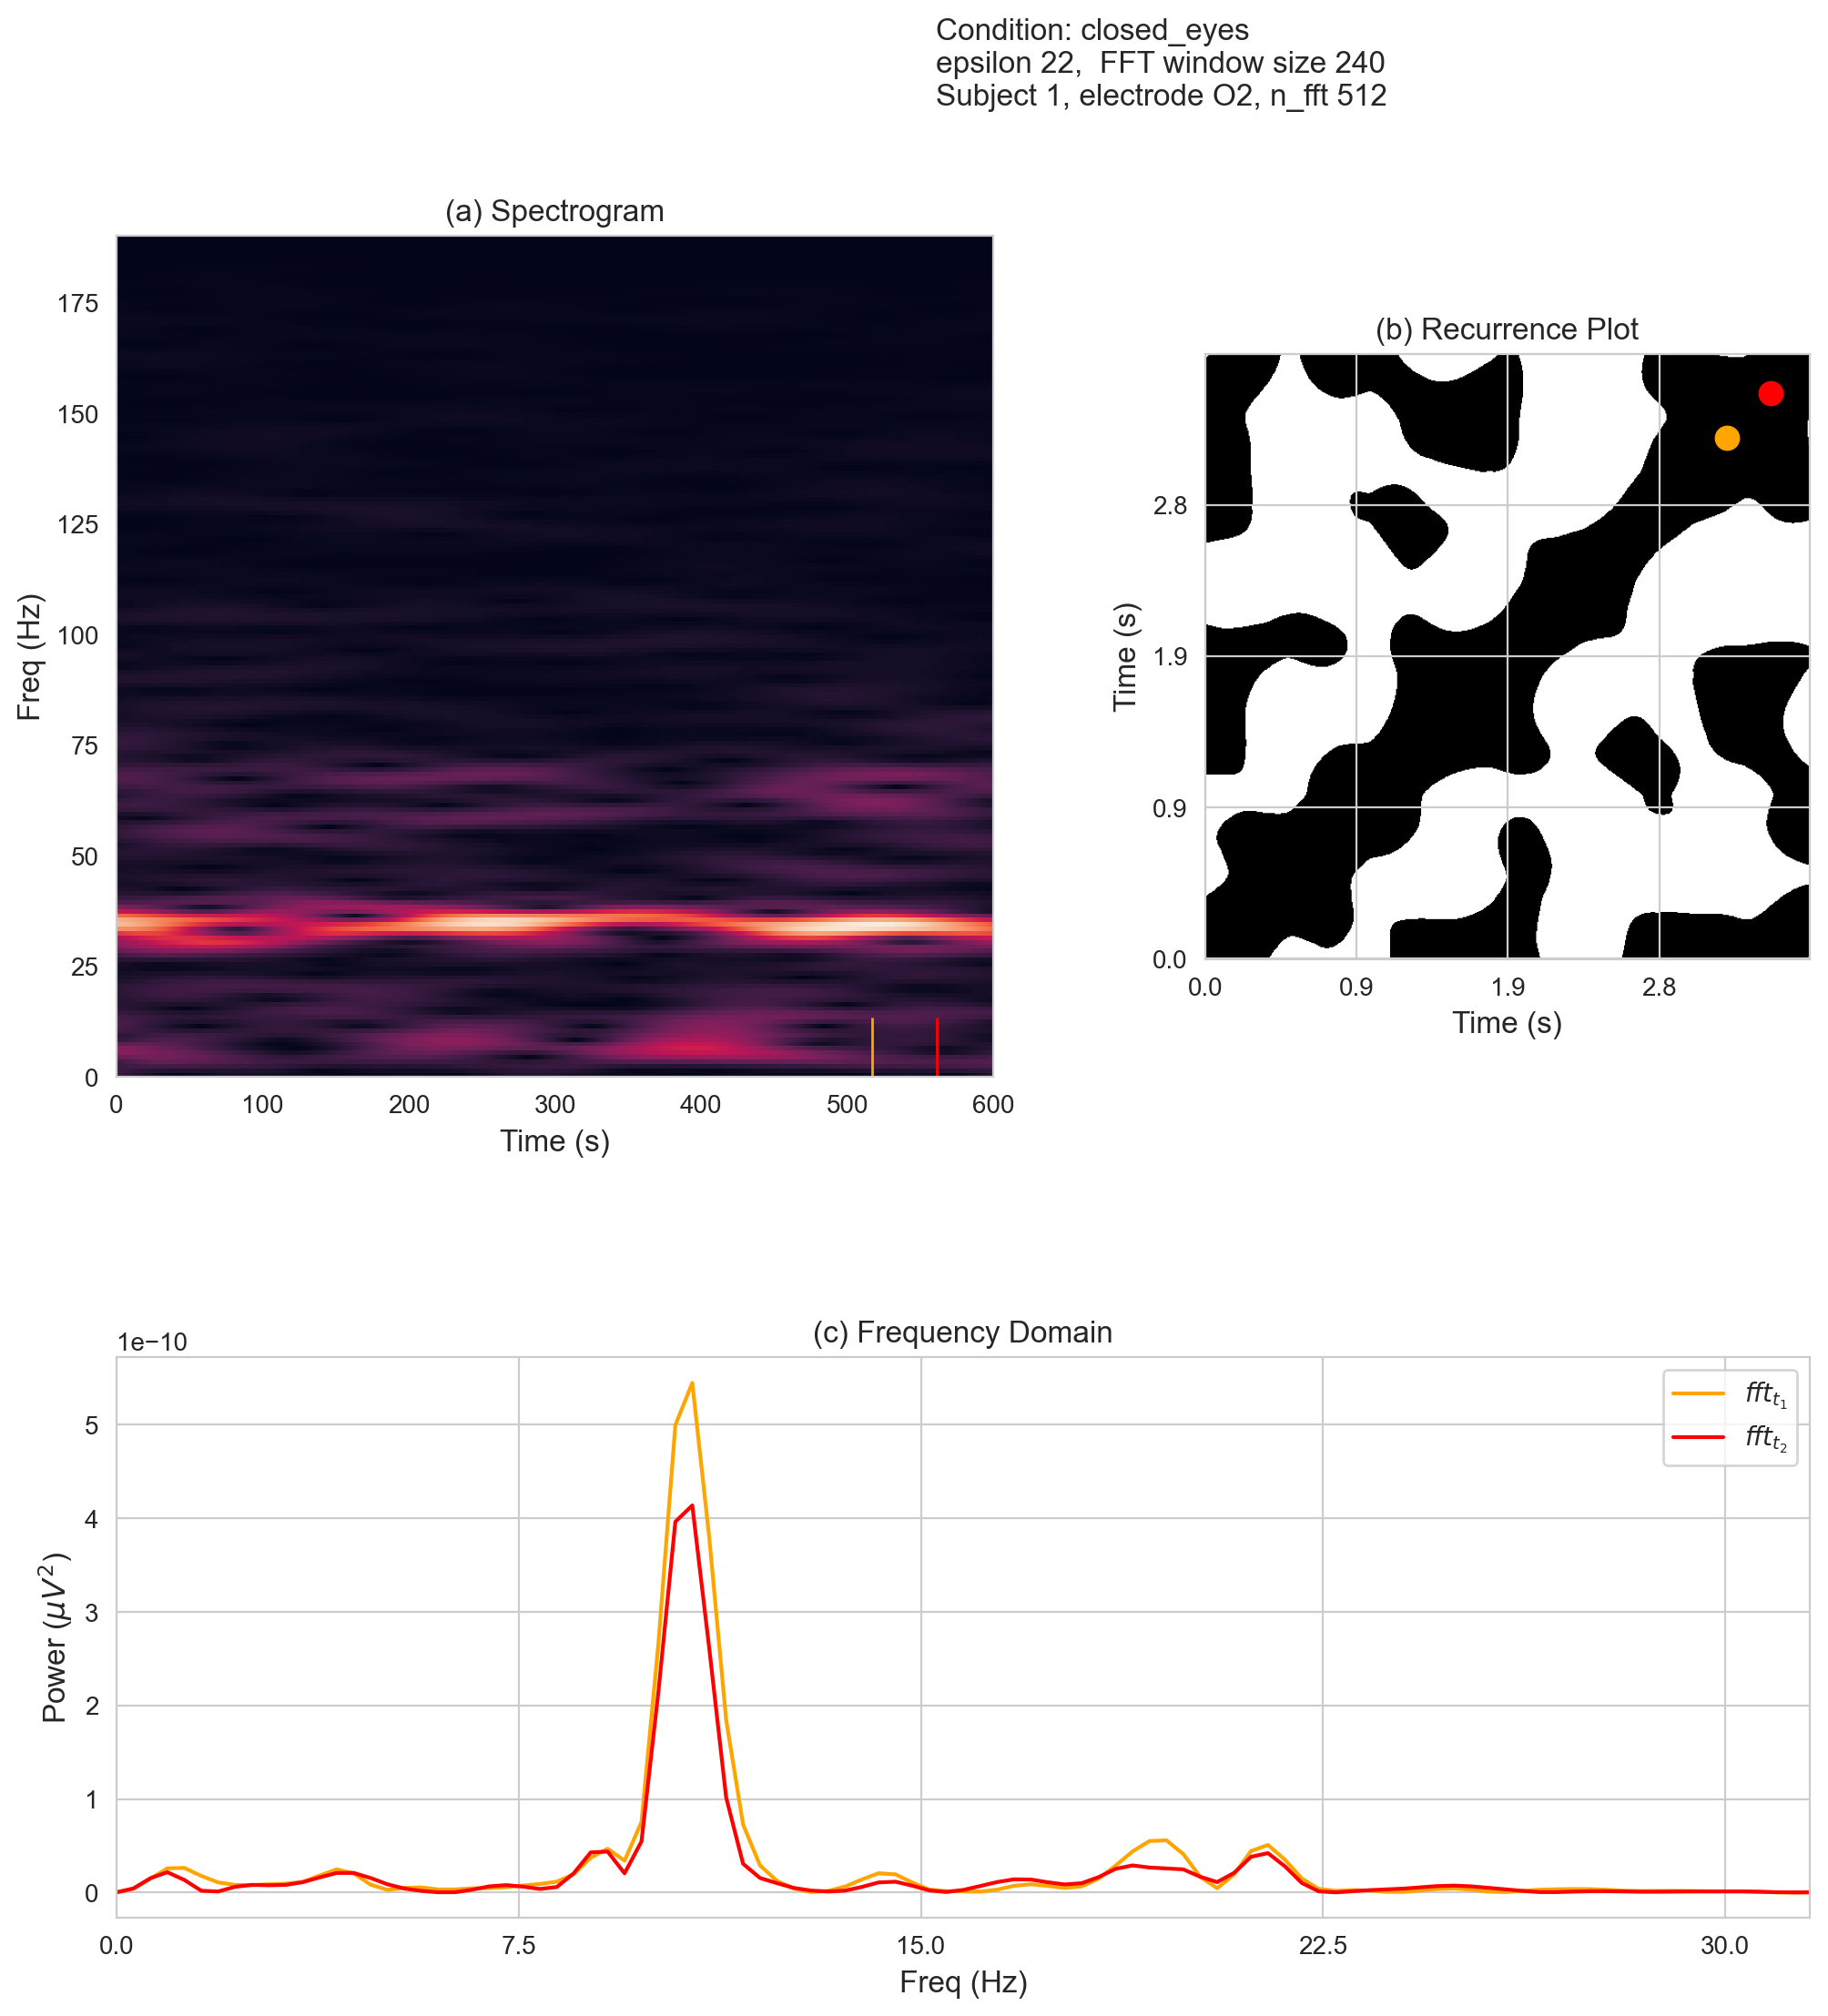

time: 788 ms (started: 2022-10-31 13:22:22 +01:00)


In [14]:
plot.stft_collections(matrix_close[100:700,100:700], matrix_close_binary[100:700,100:700], s_rate, stft_close[100:700], cut_freq, 'closed_eyes', info_args)

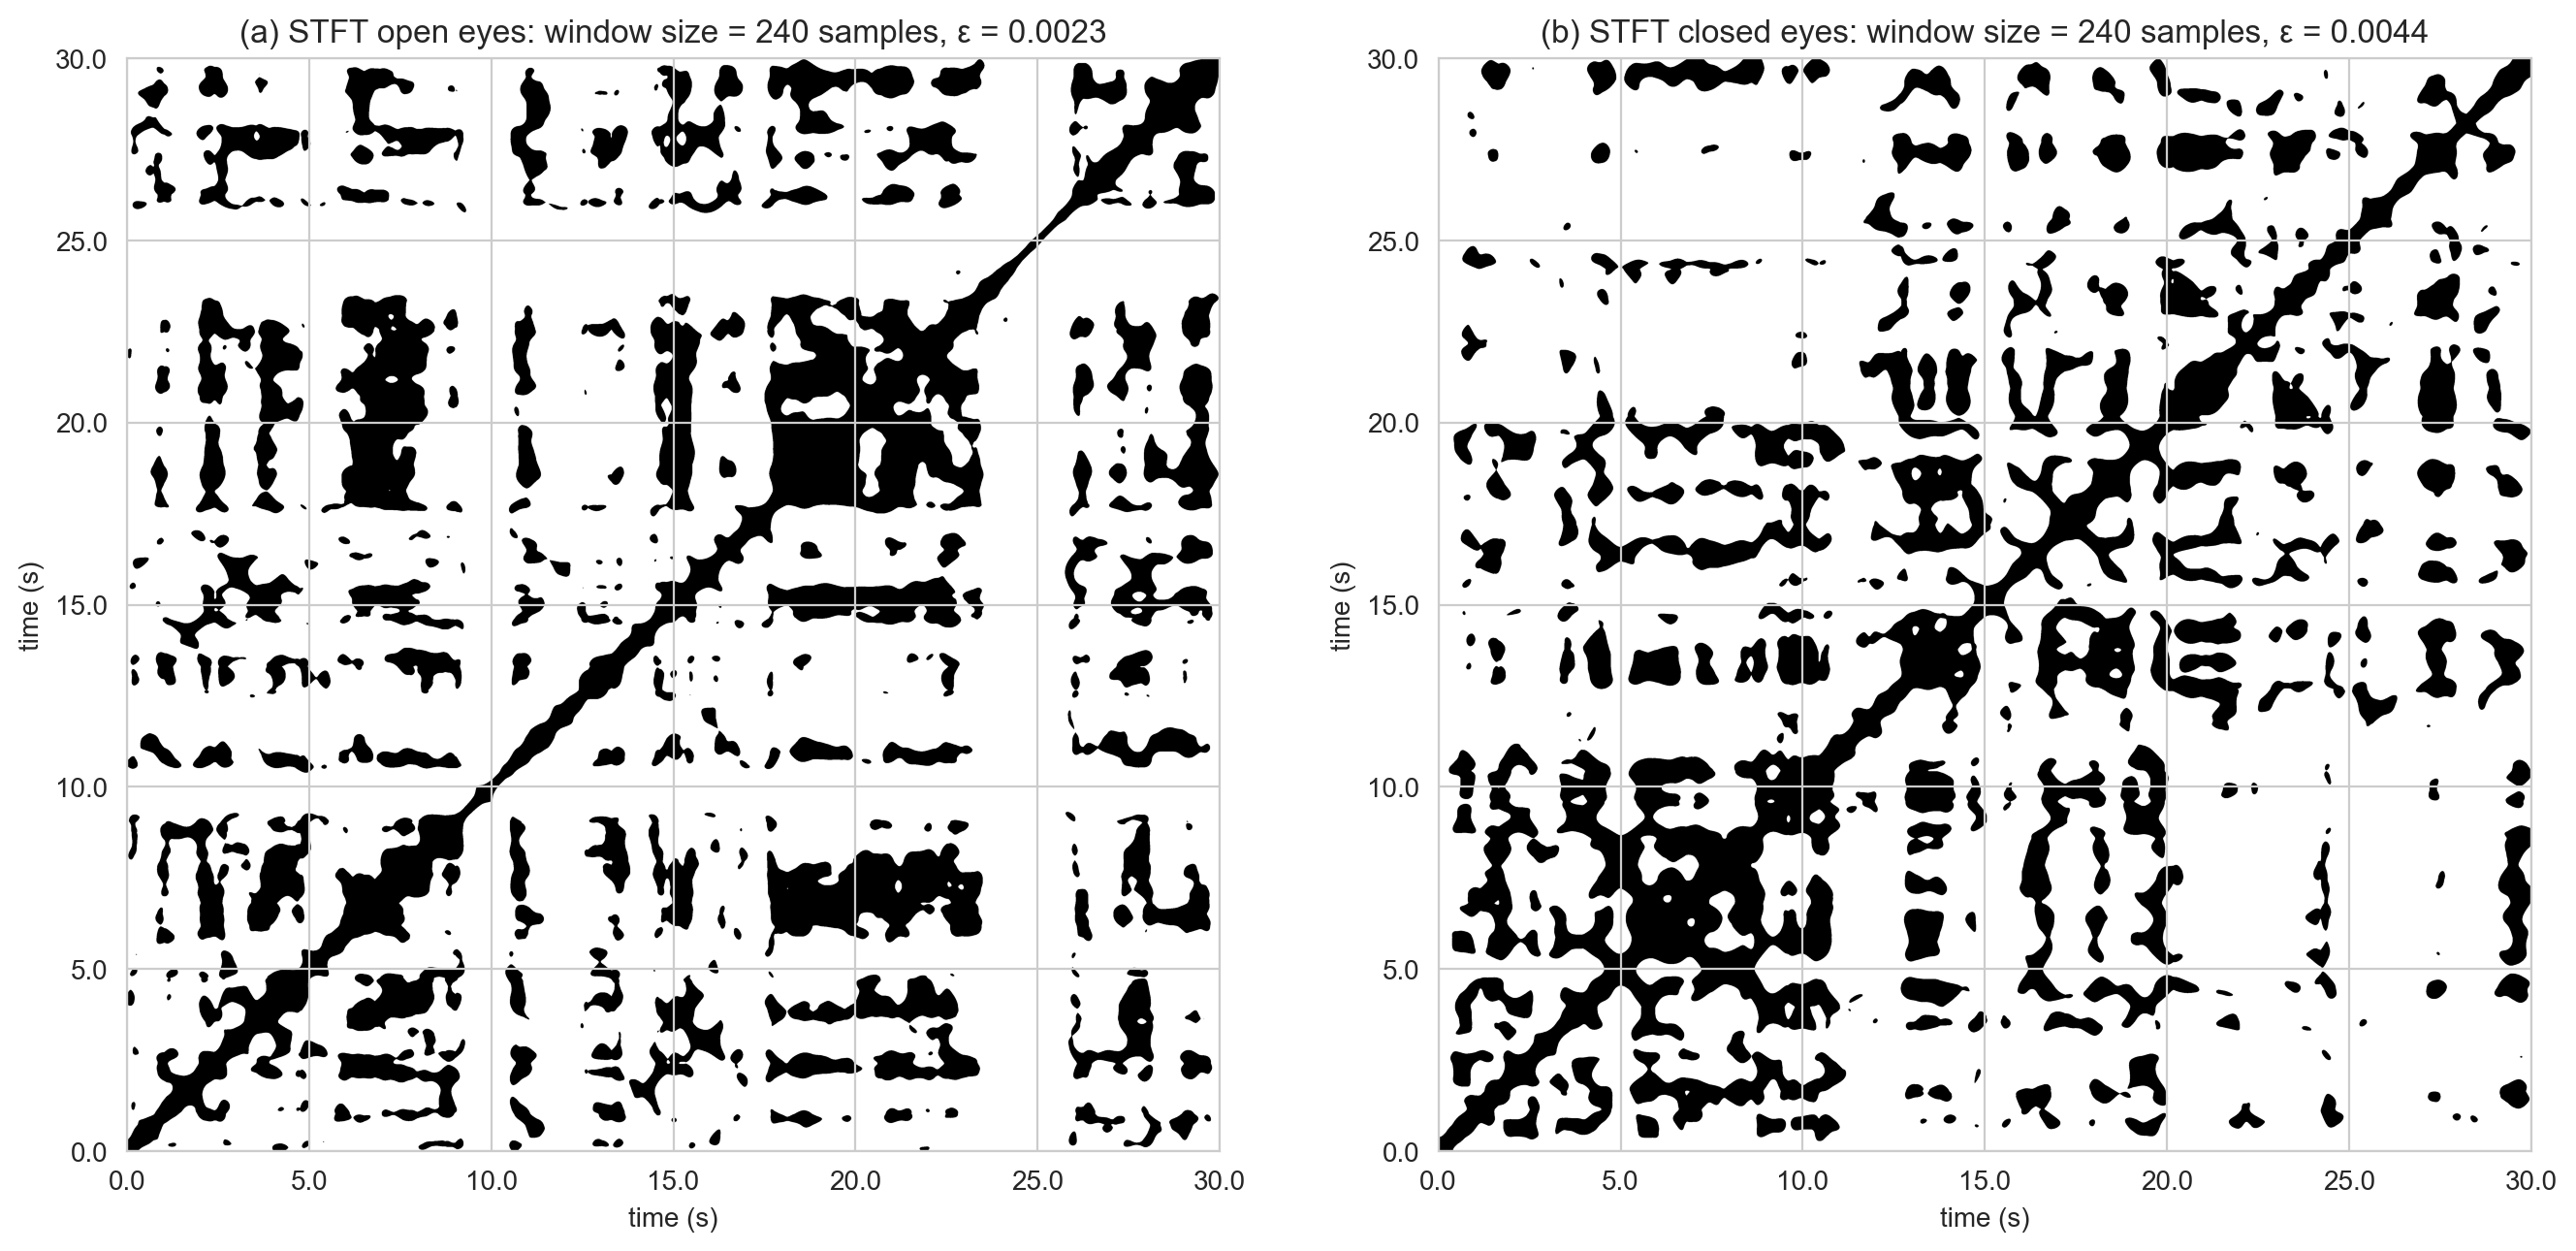

time: 3.26 s (started: 2022-10-31 13:22:58 +01:00)


In [16]:
matrix_open_to_plot = matrix_open_binary
matrix_closed_to_plot = matrix_close_binary

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16,8),dpi=200)
ax1.imshow(matrix_open_to_plot, cmap='Greys', origin='lower') #cividis
ax1.set_xticks(np.linspace(0, matrix_open_to_plot.shape[0] , ax1.get_xticks().shape[0]))
ax1.set_yticks(np.linspace(0, matrix_open_to_plot.shape[0] , ax1.get_xticks().shape[0]))
ax1.set_xticklabels([str(np.around(x,decimals=0)) for x in np.linspace(0, matrix_open_to_plot.shape[0] / s_rate, ax1.get_xticks().shape[0])])
ax1.set_yticklabels([str(np.around(x, decimals=0)) for x in np.linspace(0, matrix_open_to_plot.shape[0] / s_rate, ax1.get_yticks().shape[0])])
ax1.set_title('(a) STFT open eyes: window size = 240 samples, ε = '+str(np.round(nbr_open,4)))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('time (s)')

ax2.imshow(matrix_closed_to_plot, cmap='Greys', origin='lower')
ax2.set_xticks(np.linspace(0, matrix_closed_to_plot.shape[0] , ax1.get_xticks().shape[0]))
ax2.set_yticks(np.linspace(0, matrix_closed_to_plot.shape[0] , ax1.get_xticks().shape[0]))
ax2.set_xticklabels([str(np.around(x,decimals=0)) for x in np.linspace(0, matrix_closed_to_plot.shape[0] / s_rate, ax1.get_xticks().shape[0])])
ax2.set_yticklabels([str(np.around(x, decimals=0)) for x in np.linspace(0, matrix_closed_to_plot.shape[0] / s_rate, ax2.get_yticks().shape[0])])
ax2.set_title('(b) STFT closed eyes: window size = 240 samples, ε = '+str(np.round(nbr_close,4)))
ax2.set_xlabel('time (s)')
ax2.set_ylabel('time (s)')

plt.savefig('subplot_stft_open_close.jpg')